In [2]:
import numpy as np  # библиотека для матриц и математики
import pandas as pd  # библиотека для работы с табличками
from scipy import stats  # модуль для работы со статистикой
import scipy

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sb
from math import sqrt
import math

plt.style.use('ggplot')  # стиль графиков

%matplotlib inline

In [3]:
xls = pd.ExcelFile(r'./../table.xls')
df = xls.parse(1)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,N,567,485,471,487,N,6,11,9,4,32,N
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,Y,914,753,572,677,Y,74,125,118,40,404,Y
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,N,716,663,442,559,Y,9,26,20,9,70,N
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,Y,825,681,557,670,Y,115,124,101,21,392,Y
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,N,530,444,376,423,N,59,77,102,24,262,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,3825,West Virginia Inst. of Tech.,WV,IIB,408,340,297,349,N,502,419,369,431,N,54,43,29,11,137,N
1069,3827,West Virginia University,WV,I,535,431,361,439,Y,642,521,438,529,N,335,237,272,22,895,Y
1070,3830,West Virginia Wesleyan Coll.,WV,IIB,441,383,339,383,N,572,494,434,495,N,25,22,24,3,74,N
1071,3831,Wheeling Jesuit College,WV,IIB,403,348,282,315,N,486,416,348,381,N,8,20,25,12,65,N


# 9.1.1

In [4]:
X = df.A15.to_numpy()
Y = df.A13.to_numpy()

In [5]:
def f(x):
    return beta_1 * x + beta_0

In [6]:
r, _ = stats.pearsonr(X, Y)
s1 = np.std(X, ddof=1)
s2 = np.std(Y, ddof=1)
r, s1, s2

(0.5719628587649872, 145.87346745206614, 118.50561190713184)

In [7]:
beta_0 = np.mean(Y) - r * (s2/s1) * np.mean(X)

In [8]:
beta_1 = r * (s2/s1)

In [9]:
beta_0, beta_1

(488.9932986745056, 0.46465481180372936)

In [10]:
data = {
    'X': X,
    'Y': f(X)
}
df1 = pd.DataFrame(data)
df1

,X,Y
0,6,491.781228
1,74,523.377755
2,9,493.175192
3,115,542.428602
4,59,516.407933
...,...,...
1068,54,514.084659
1069,335,644.652661
1070,25,500.609669
1071,8,492.710537


In [11]:
X_grp = df1.groupby('X')
X_grp

In [12]:
len(X), len(X_grp)

(1073, 292)

In [13]:
n = len(Y)
D_YX = np.sum(X_grp.count().to_numpy() * (X_grp.mean().to_numpy() - np.mean(Y)) ** 2) * 1 / n
D_YX

4589.956334189041

In [14]:
D_res = np.var(Y)
D_res

14030.491908047135

In [15]:
D_resY = np.sum((Y - f(X)) ** 2) / n

# D_resY = np.mean((Y - f(X)) ** 2)
D_resY

9440.535573858091

In [16]:
print(f"{D_YX = }")
print(f"{D_resY = }")
print(f"{D_res = }")
print(f"{D_YX + D_resY = }")

D_YX = 4589.956334189041
D_resY = 9440.535573858091
D_res = 14030.491908047135
D_YX + D_resY = 14030.491908047132


In [23]:
print("Коэффициент детерминации: ", D_YX/D_res)
print("Кореляционное отношение: ", np.sqrt(D_YX/D_res))

Коэффициент детерминации:  0.3271415118066166
Кореляционное отношение:  0.5719628587649871


In [24]:
D_Y = D_res
R_YX = D_YX / D_Y
R_YX

0.3271415118066166

In [18]:
new_D_res = np.sum((Y - f(X)) ** 2) / (n - 2)

X_sum = 0
for i in range(len(X)):
    X_sum += (X[i])**2
alpha = [0.01, 0.05, 0.1]
for a in alpha:
    beta_0_lower = beta_0 - stats.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res * X_sum / (n**2 * X.var()))
    beta_0_upper = beta_0 + stats.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res * X_sum / (n**2 * X.var()))
    beta_1_lower = beta_1 - stats.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res / (n**2 * X.var()))
    beta_1_upper = beta_1 + stats.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res / (n**2 * X.var()))
    print(f"Степнь уверенности: {a}")
    print(f"Нижняя граница b0: {round(beta_0_lower, 3)}")
    print(f"Верхняя граница b0: {round(beta_0_upper, 3)}")
    print(f"Нижняя граница b1: {round(beta_1_lower, 3)}")
    print(f"Верхняя граница b1: {round(beta_1_upper, 3)}")

Степнь уверенности: 0.01
Нижняя граница b0: 479.629
Верхняя граница b0: 498.357
Нижняя граница b1: 0.463
Верхняя граница b1: 0.466
Степнь уверенности: 0.05
Нижняя граница b0: 481.873
Верхняя граница b0: 496.114
Нижняя граница b1: 0.463
Верхняя граница b1: 0.466
Степнь уверенности: 0.1
Нижняя граница b0: 483.019
Верхняя граница b0: 494.967
Нижняя граница b1: 0.464
Верхняя граница b1: 0.466


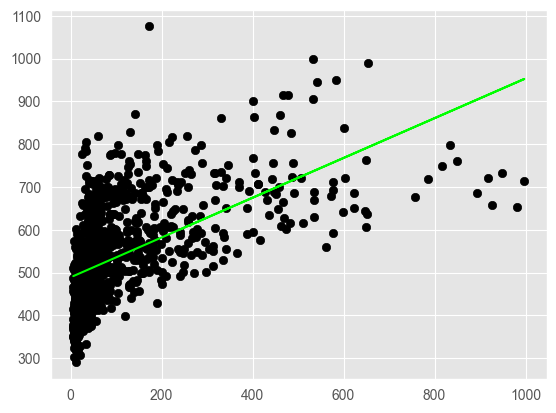

In [19]:
plt.scatter(X, Y, color = 'black')
lin_reg = beta_1 * X + beta_0
plt.plot(X, lin_reg, color='lime')

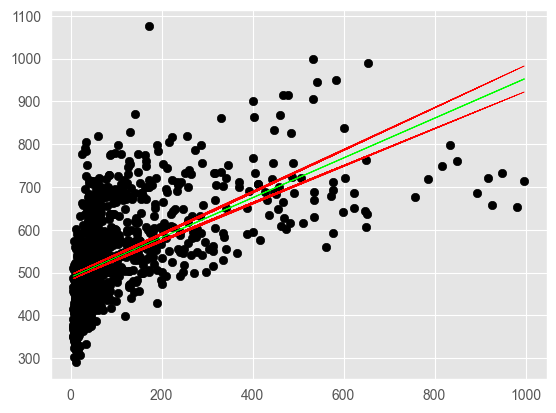

In [20]:
X_sum = 0
quantile = stats.t(n-2).ppf(1- 0.1/2)

for i in range(len(X)):
    X_sum += (X[i])**2
flow = []
fhigh = []

for i in range(n):
    flow.append(f(X[i]) - quantile * np.sqrt(new_D_res * (1 / n + (X[i] - X.mean()) ** 2 / (n * X.var()))))
    fhigh.append(f(X[i]) + quantile * np.sqrt(new_D_res * (1 / n + (X[i] - X.mean()) ** 2 / (n * X.var()))))
plt.scatter(X, Y, color='black')
lin_reg = beta_1*X + beta_0

plt.plot(X, lin_reg, color='lime', linewidth = 0.8)
plt.plot(X, fhigh, linestyle = '-',color='red', linewidth = 0.5)
plt.plot(X, flow, linestyle = '-', color='red', linewidth = 0.5)

-20.52299830069933

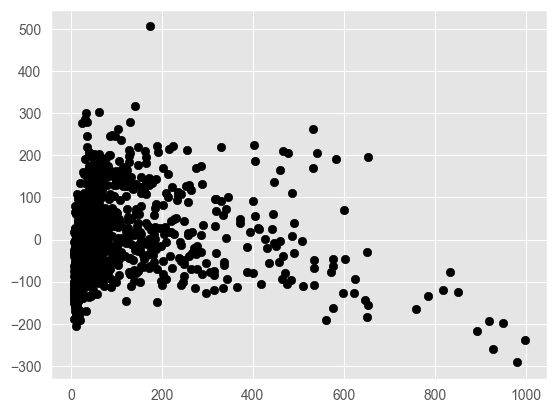

In [31]:
from sklearn.linear_model import LinearRegression

plt.scatter(X, Y - f(X), color='black')
model = LinearRegression()
model.fit(X.reshape((-1, 1)), Y - f(X))
model.score(X.reshape((-1, 1)), Y)

In [29]:
z = R_YX / ((1 - R_YX ) / (n - 2))
print(f'Sign test: z = {z}, p-value = {1 - stats.f(1, n - 2).cdf(z)}')

Sign test: z = 520.7165626841114, p-value = 1.1102230246251565e-16


In [28]:
z = D_YX / (D_resY / (n - 2))
print(f'Sign test: z = {z}, p-value = {1 - stats.f(1, n - 2).cdf(z)}')

Sign test: z = 520.7165626841116, p-value = 1.1102230246251565e-16
